In [1]:
# Set JAX_PLATFORMS=''
import os
os.environ["JAX_PLATFORMS"] = "cpu"
from flaxdiff.inference.pipeline import DiffusionInferencePipeline

/home/mrwhite0racle/miniconda3/envs/flaxdiff/lib/python3.11/site-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
2025-04-29 00:27:53.565822: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745886473.589353 2580810 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745886473.596254 2580810 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745886473.6

In [2]:
pipeline = DiffusionInferencePipeline.from_wandb_registry(
    modelname='diffusion-oxford_flowers102-res256',
    project='mlops-msml605-project',
    entity='umd-projects',
)


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Downloading large artifact diffusion-oxford_flowers102-res256:latest, 1049.57MB. 14 files... 
wandb:   14 of 14 files downloaded.  
Done. 0:0:1.1


Loaded model from wandb registry: diffusion-oxford_flowers102-res256 at path /home/mrwhite0racle/mlops-diffusion-project/artifacts/diffusion-oxford_flowers102-res256:v0
Loaded checkpoint from local dir /home/mrwhite0racle/mlops-diffusion-project/artifacts/diffusion-oxford_flowers102-res256:v0
Using autoencoder: stable_diffusion
Using Stable Diffusion Autoencoder for Latent Diffusion Modeling
Ignoring key dtype with value <class 'jax.numpy.bfloat16'> as it contains a dot.
Scaling factor: 0.18215
Calculating downscale factor...
Downscale factor: 8
Latent channels: 4


Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing FlaxCLIPTextModel: {('vision_model', 'encoder', 'layers', '15', 'self_attn', 'q_proj', 'kernel'), ('vision_model', 'encoder', 'layers', '17', 'mlp', 'fc1', 'bias'), ('vision_model', 'encoder', 'layers', '15', 'mlp', 'fc1', 'kernel'), ('vision_model', 'encoder', 'layers', '8', 'self_attn', 'q_proj', 'bias'), ('vision_model', 'encoder', 'layers', '0', 'self_attn', 'out_proj', 'bias'), ('vision_model', 'encoder', 'layers', '8', 'mlp', 'fc1', 'bias'), ('vision_model', 'encoder', 'layers', '12', 'mlp', 'fc2', 'kernel'), ('vision_model', 'encoder', 'layers', '17', 'mlp', 'fc2', 'bias'), ('vision_model', 'encoder', 'layers', '15', 'mlp', 'fc2', 'kernel'), ('vision_model', 'encoder', 'layers', '11', 'mlp', 'fc2', 'bias'), ('vision_model', 'encoder', 'layers', '7', 'self_attn', 'v_proj', 'kernel'), ('vision_model', 'encoder', 'layers', '5', 'self_attn', 'out_proj', 'bias'), ('vision_model', 'en

Model kwargs after mapping: {'name': None, 'dtype': <class 'jax.numpy.bfloat16'>, 'precision': None, 'activation': <PjitFunction of <function silu at 0x7f32286dc5e0>>, 'named_norms': False, 'norm_groups': 8, 'emb_features': 256, 'feature_depths': [64, 64, 128, 256, 512], 'num_res_blocks': 2, 'output_channels': 4, 'attention_configs': [None, {'dtype': <class 'jax.numpy.float32'>, 'heads': 8, 'use_projection': False, 'flash_attention': False, 'use_self_and_cross': True}, {'dtype': <class 'jax.numpy.float32'>, 'heads': 8, 'use_projection': False, 'flash_attention': False, 'use_self_and_cross': True}, {'dtype': <class 'jax.numpy.float32'>, 'heads': 8, 'use_projection': False, 'flash_attention': False, 'use_self_and_cross': True}, {'dtype': <class 'jax.numpy.float32'>, 'heads': 8, 'use_projection': False, 'flash_attention': False, 'use_self_and_cross': False}], 'num_middle_res_blocks': 1}


In [3]:
prompts = [
    'water tulip',
    'a water lily',
    'a water lily',
    'a photo of a rose',
    'a photo of a rose',
    'a water lily',
    'a water lily',
    'a photo of a marigold',
]

samples = pipeline.generate_samples(
    num_samples=len(prompts),
    resolution=256,
    diffusion_steps=100,
    guidance_scale=3.0,
    start_step=1000,
    conditioning_data=prompts,
)

Created null embeddings for guidance with shape (1, 77, 768)
Using classifier-free guidance
Generating samples: steps=100, num_samples=8, guidance=3.0
Processing raw conditioning inputs to generate model conditioning inputs


100%|██████████| 100/100 [00:30<00:00,  3.29it/s]


In [7]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp


def normalizeImage(x): return jax.nn.standardize(x, mean=[127.5], std=[127.5])
def denormalizeImage(x): return (x + 1.0) * 127.5


def plotImages(imgs, fig_size=(8, 8), dpi=100):
    fig = plt.figure(figsize=fig_size, dpi=dpi)
    imglen = imgs.shape[0]
    for i in range(imglen):
        plt.subplot(fig_size[0], fig_size[1], i + 1)
        plt.imshow(jnp.astype(denormalizeImage(imgs[i, :, :, :]), jnp.uint8))
        plt.axis("off")
    plt.show()

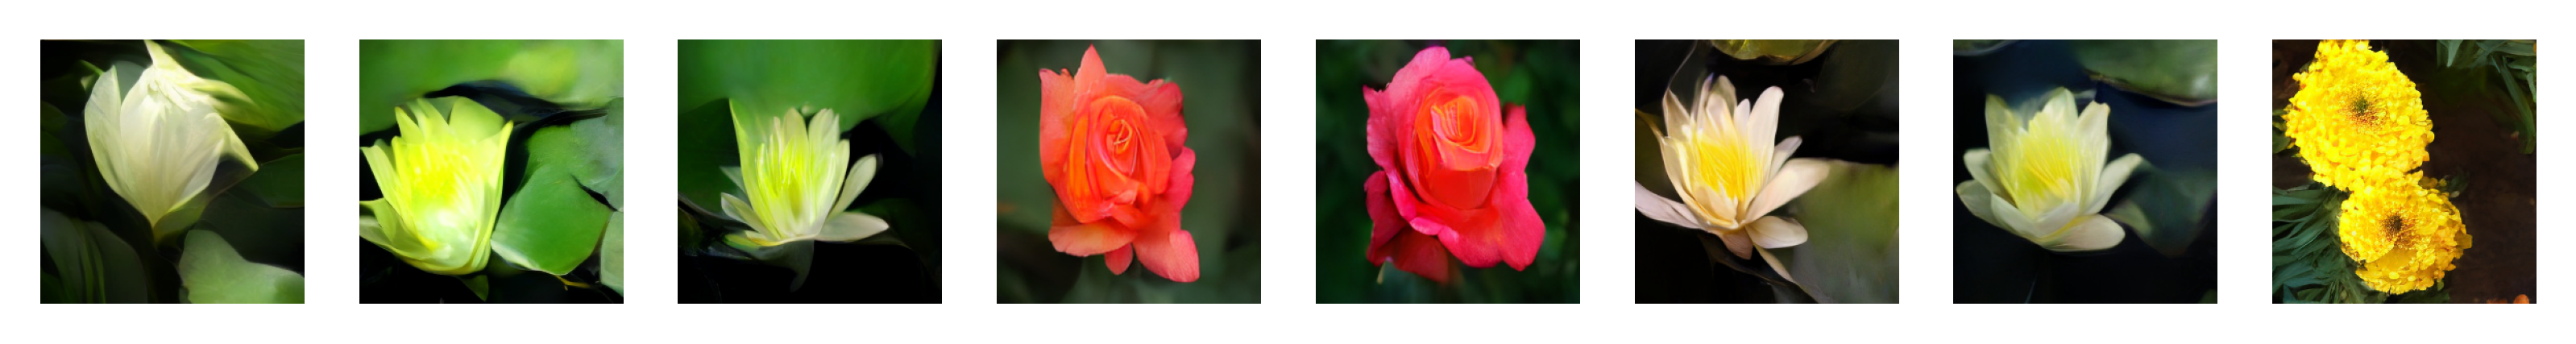

In [8]:
plotImages(samples, dpi=500)